In [15]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.evaluate import detect
from tools.resize import scale_to_square
%matplotlib inline

In [3]:
config = YamlConfig("cfg/train.yaml")
config["dataset"]["images"] = "SVD_ims"
config["save_conf_name"] = "coco_finetune_SVD_00.yaml"

In [3]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 316s 2s/step - loss: 1.5283 - rpn_class_loss: 0.0459 - rpn_bbox_loss: 0.3472 - mrcnn_class_loss: 0.3155 - mrcnn_bbox_loss: 0.4054 - mrcnn_mask_loss: 0.4142 - val_loss: 1.2665 - val_rpn_class_loss: 0.0238 - val_rpn_bbox_loss: 0.3795 - val_mrcnn_class_loss: 0.2148 - val_mrcnn_bbox_loss: 0.3349 - val_mrcnn_mask_loss: 0.3135
Epoch 2/10
150/150 [==============================] - 126s 837ms/step - loss: 1.1711 - rpn_class_loss: 0.0298 - rpn_bbox_loss: 0.3054 - mrcnn_class_loss: 0.2069 - mrcnn_bbox_loss: 0.3023 - mrcnn_mask_loss: 0.3266 - val_loss: 1.0770 - val_rpn_class_loss: 0.0240 - val_rpn_bbox_loss: 0.3260 - val_mrcnn_class_loss: 0.1690 - val_mrcnn_bbox_loss: 0.2766 - val_mrcnn_mask_loss: 0.2814
Epoch 3/10
150/150 [==============================] - 156s 1s/step - loss: 1.0123 - rpn_class_loss: 0.0171 - rpn_bbox_loss: 0.2398 - mrcnn_class_loss: 0.1720 - mrcnn_bbox_loss: 0.2642 - mrcnn_mask_loss: 0.3191 - val_loss: 1.4881 - val_rpn_clas

In [3]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_svd20181219T1343/mask_rcnn_sdmaskrcnn_finetune_svd_0010.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Loading weights from  models/sdmaskrcnn_finetune_svd20181219T1343/mask_rcnn_sdmaskrcnn_finetune_svd_0010.h5
Re-starting from epoch 10


{'rois': array([[248, 240, 337, 334],
       [135, 354, 243, 467],
       [252, 366, 397, 510],
       [186, 440, 269, 499],
       [317, 305, 423, 406],
       [114, 328, 157, 389],
       [109, 101, 292, 303],
       [212, 302, 304, 404],
       [ 97, 236, 197, 306],
       [123, 315, 189, 379],
       [370, 439, 413, 512],
       [223, 117, 296, 263],
       [173, 194, 238, 254],
       [255, 338, 307, 392],
       [173, 370, 216, 420]], dtype=int32), 'scores': array([0.9999707 , 0.99971753, 0.99971706, 0.9986192 , 0.9984598 ,
       0.9976549 , 0.99517184, 0.9901489 , 0.98262995, 0.98046863,
       0.9651613 , 0.93572664, 0.9105238 , 0.90360755, 0.73839474],
      dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 15)


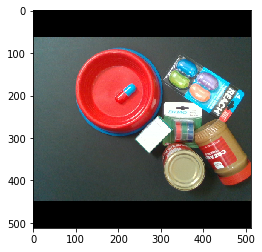

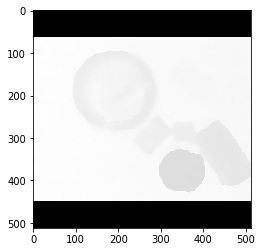

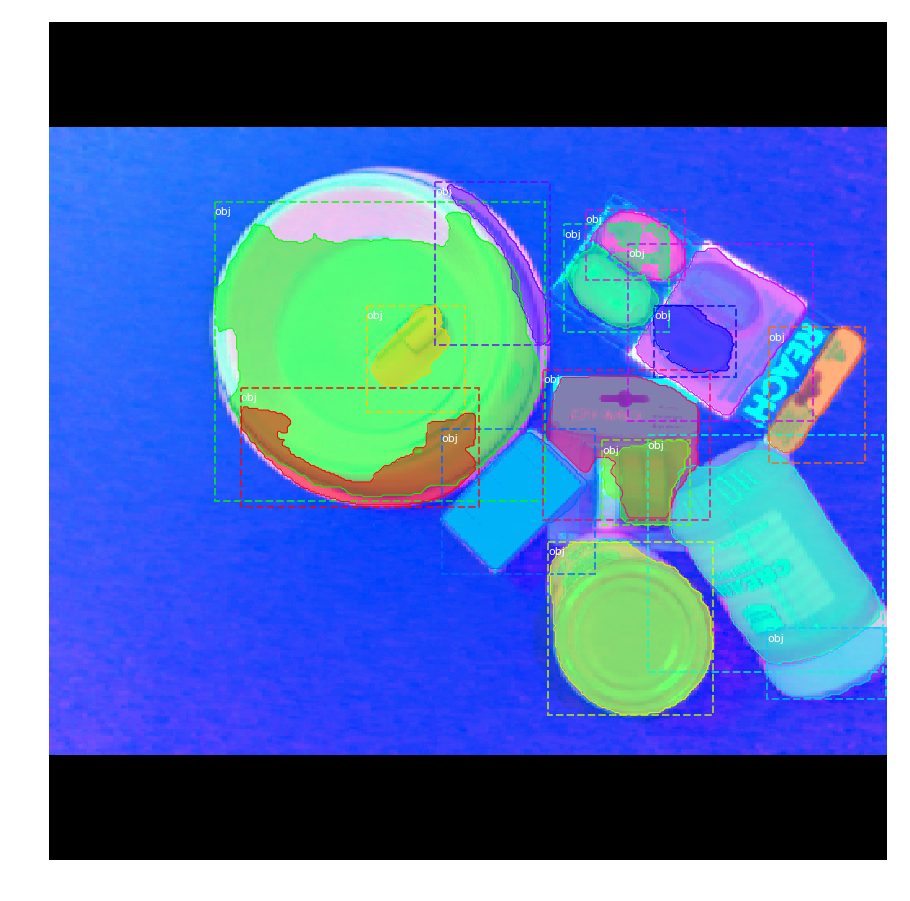

{'rois': array([[130, 206, 207, 366],
       [344, 196, 439, 267],
       [180, 425, 242, 466],
       [324, 315, 431, 426],
       [233, 248, 326, 422],
       [235, 366, 264, 430],
       [166, 110, 210, 203],
       [164,  11, 226, 209],
       [261, 355, 329, 434],
       [278, 296, 325, 400],
       [291, 395, 319, 435]], dtype=int32), 'scores': array([0.9999238 , 0.99990284, 0.99867463, 0.9986518 , 0.9985293 ,
       0.99115074, 0.98624295, 0.98268753, 0.92532086, 0.8669478 ,
       0.72506887], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 11)


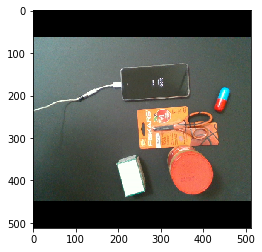

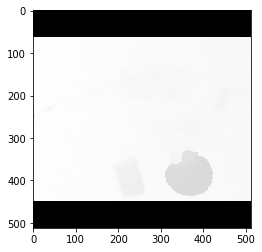

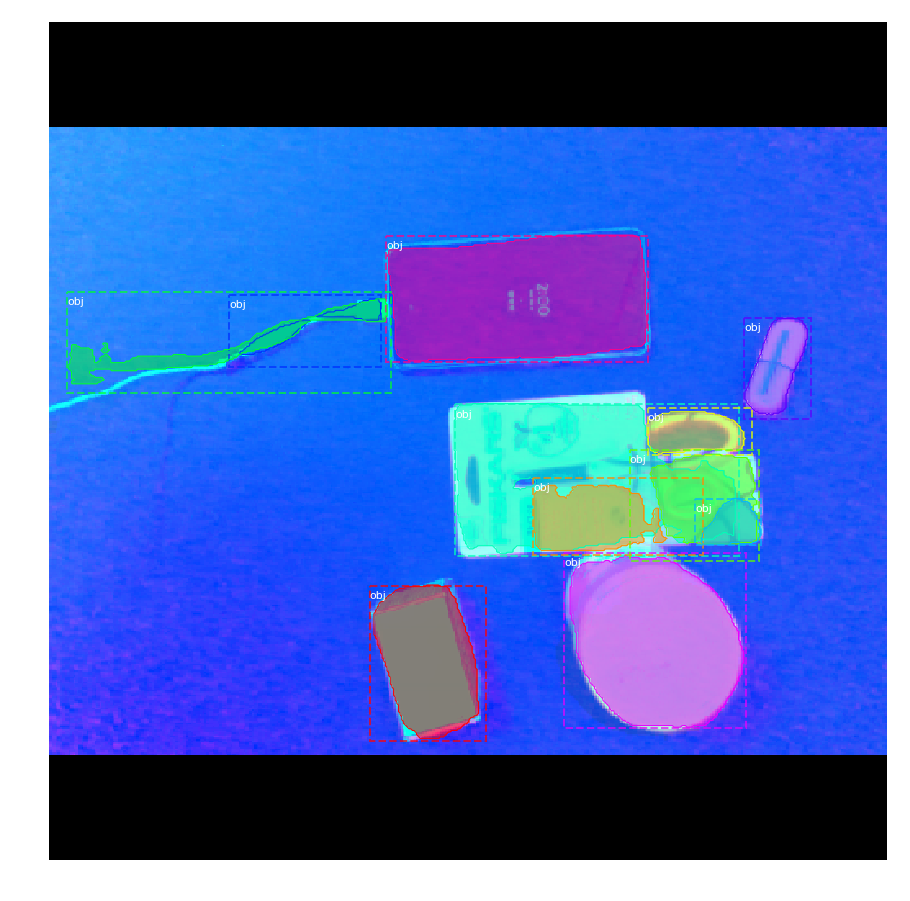

{'rois': array([[350, 277, 405, 330],
       [236, 127, 293, 245],
       [166, 324, 222, 387],
       [197, 167, 303, 454],
       [149, 386, 316, 510],
       [147, 145, 242, 326],
       [138, 266, 165, 409],
       [229, 264, 331, 511]], dtype=int32), 'scores': array([0.99996686, 0.9994456 , 0.99812096, 0.96077025, 0.94924253,
       0.91769624, 0.8265048 , 0.75578976], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 8)


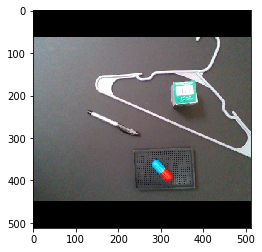

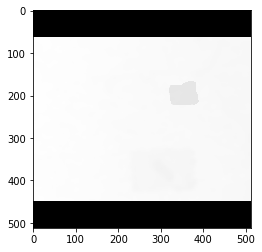

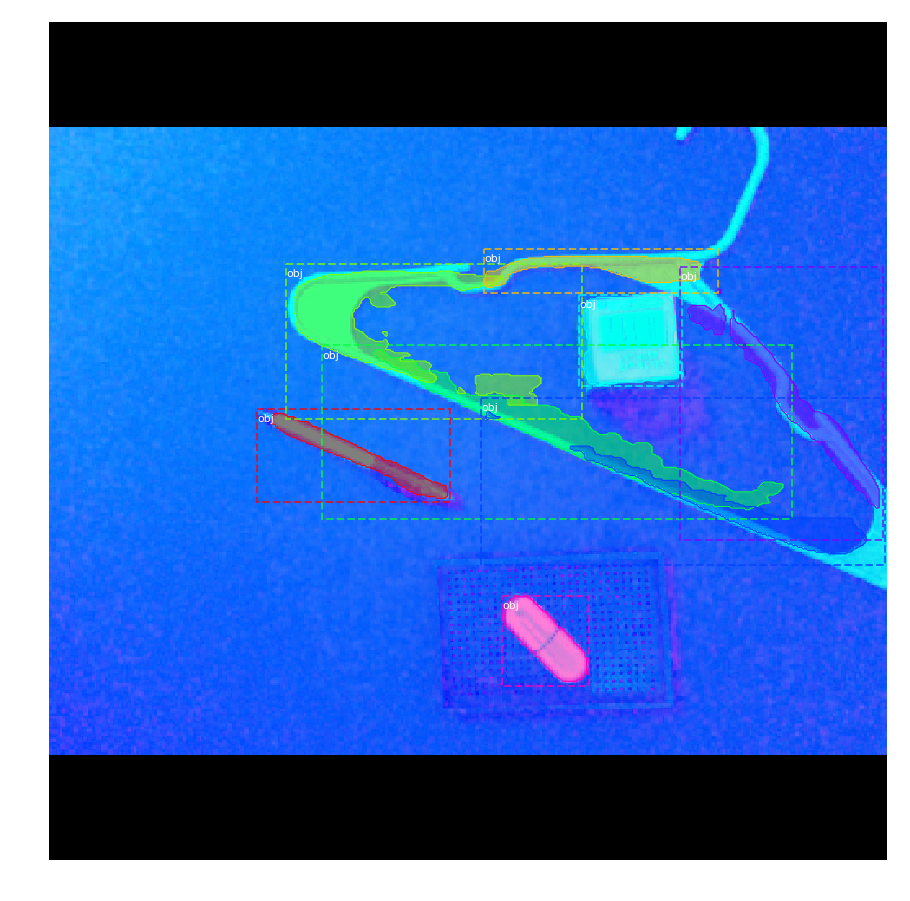

{'rois': array([[262, 155, 355, 291],
       [157, 210, 245, 281],
       [186, 411, 233, 466],
       [276, 340, 319, 414],
       [334, 364, 365, 424],
       [171, 303, 246, 372],
       [289, 353, 370, 424],
       [172, 262, 269, 412]], dtype=int32), 'scores': array([0.9999856 , 0.99971324, 0.9996928 , 0.9975829 , 0.9909739 ,
       0.95345926, 0.9102478 , 0.7582641 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 8)


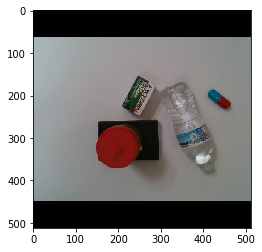

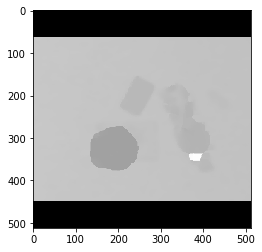

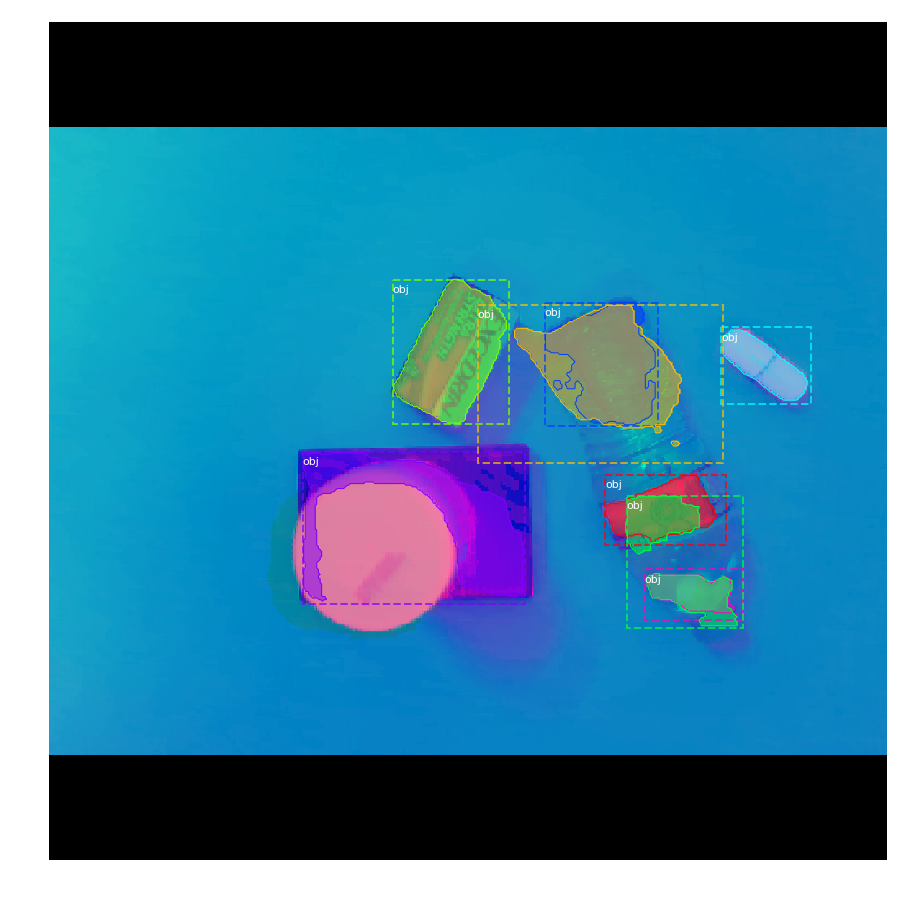

{'rois': array([[170, 277, 263, 363],
       [266, 255, 377, 366],
       [246, 409, 325, 494],
       [206, 162, 322, 303],
       [198, 412, 245, 501],
       [321, 405, 386, 470],
       [256, 170, 325, 259],
       [272, 448, 326, 493],
       [224, 276, 280, 345]], dtype=int32), 'scores': array([0.99992585, 0.9998996 , 0.99934286, 0.9991252 , 0.99807215,
       0.9980101 , 0.9737626 , 0.94662744, 0.85326505], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 9)


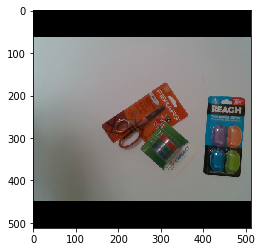

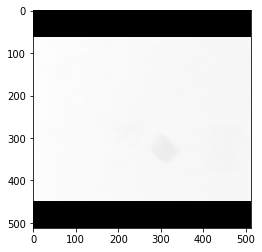

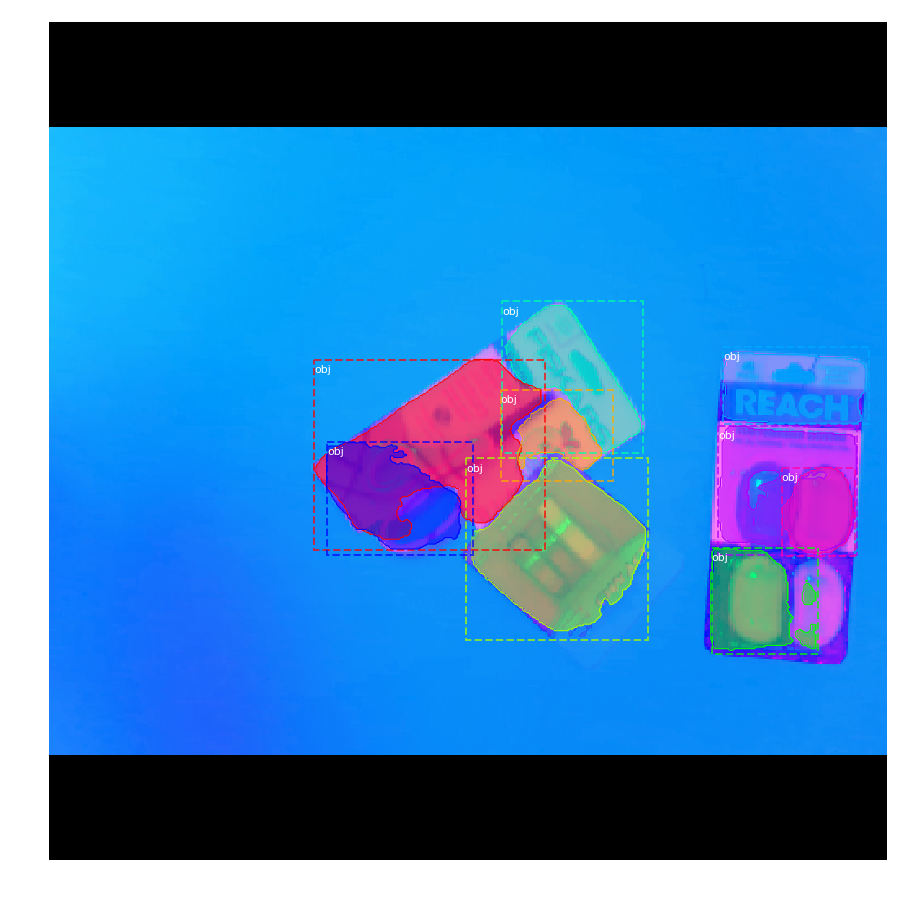

{'rois': array([[167, 429, 231, 499],
       [167, 276, 296, 435],
       [186, 223, 372, 350]], dtype=int32), 'scores': array([0.99995315, 0.9995999 , 0.998412  ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


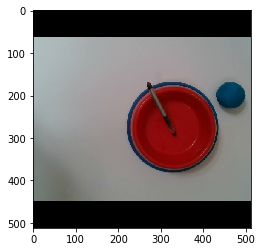

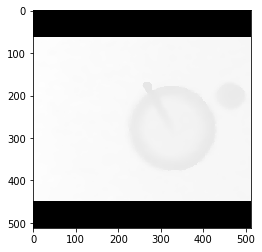

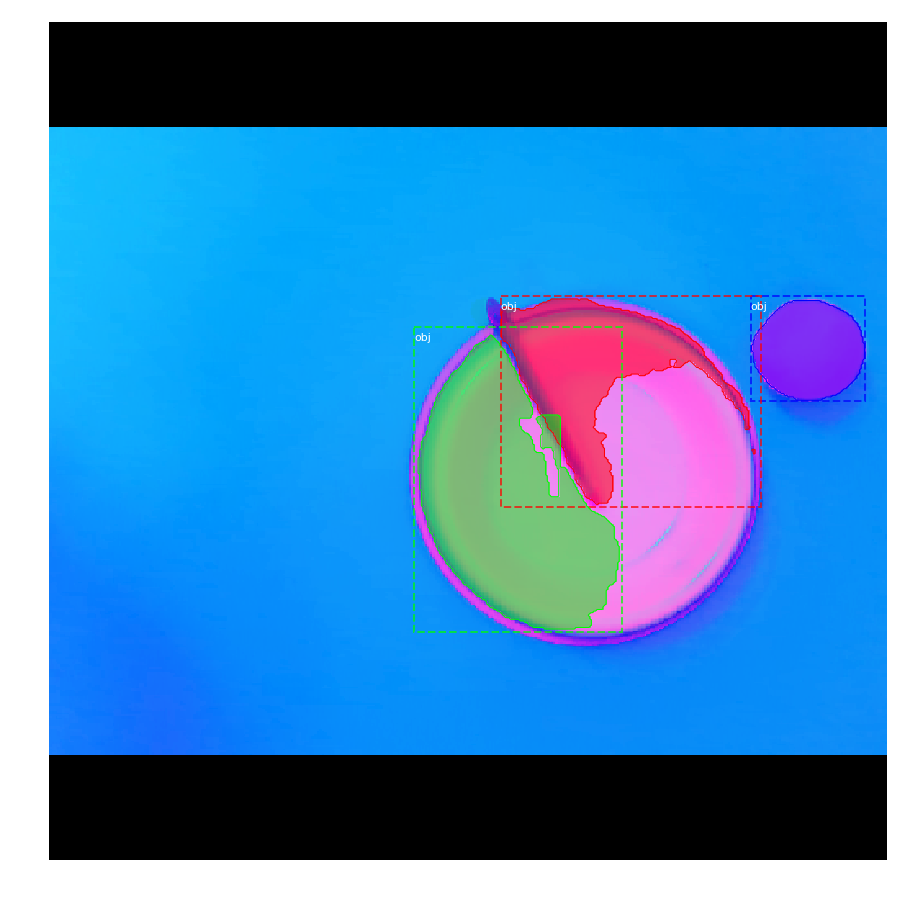

{'rois': array([[263, 263, 298, 355],
       [233, 102, 307, 200]], dtype=int32), 'scores': array([0.9912656 , 0.73108983], dtype=float32), 'class_ids': array([1, 1], dtype=int32)}
(512, 512, 2)


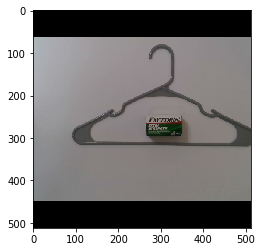

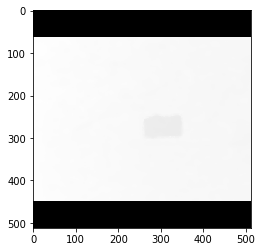

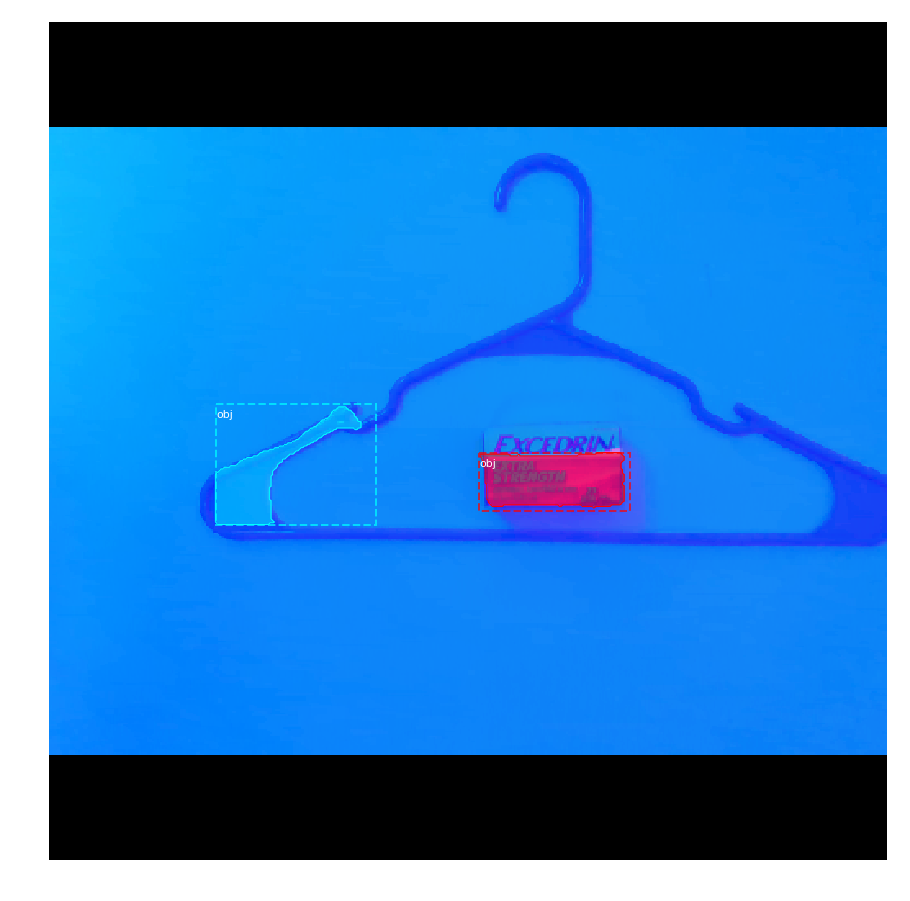

{'rois': array([[260, 399, 331, 471],
       [155, 272, 253, 369],
       [294, 243, 355, 356]], dtype=int32), 'scores': array([0.9999976 , 0.99997056, 0.9998373 ], dtype=float32), 'class_ids': array([1, 1, 1], dtype=int32)}
(512, 512, 3)


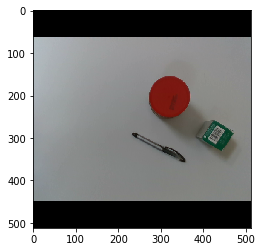

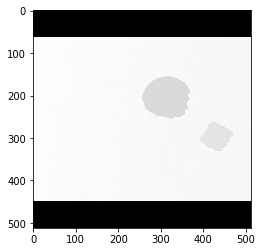

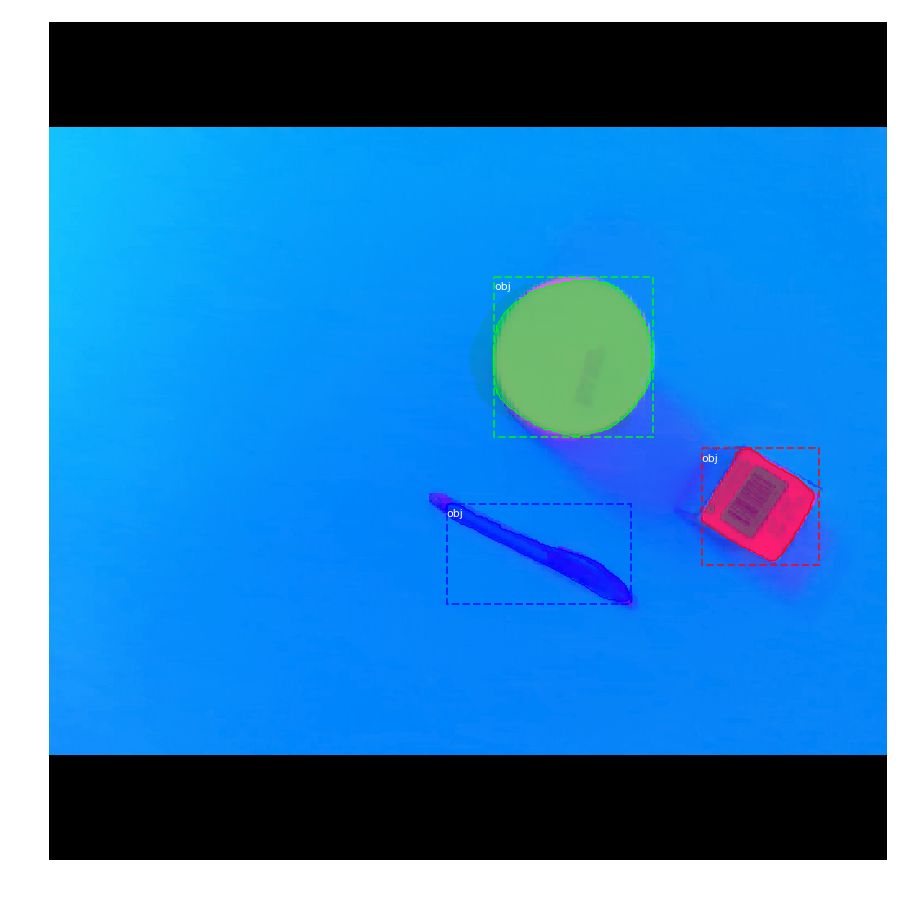

In [21]:
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"

for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))
    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_CONSTANT, value=0)
    
    plt.figure()
    plt.imshow(color)
    plt.figure()
    plt.imshow(depth)
    
    hsv = (skimage.color.convert_colorspace(color, "RGB", "HSV") * 255).astype(np.uint8)
    inp_img = np.zeros(hsv.shape)
    inp_img[..., 0] = hsv[..., 1]
    inp_img[..., 1] = hsv[..., 2]
    inp_img[..., 2] = depth[..., 0]
    detect(model, inp_img)